# Test case for diffraction grat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# principal point
c_proj = np.array([100, 100]) # px
c_cam = np.array([100, 100])  # px

# translation 
t_proj = np.array([0, 0, 0])  # m
t_cam = np.array([-50e-3, 0, 0]) # m

# Rotation of the camera w.r.t. the projector
R_cam = np.eye(3)

# intrinsic parameters
f_proj = 8e-3  # m
pitch_proj = 6e-6  # m
f_cam = f_proj
pitch_cam = pitch_proj

# Resolution of both camera and projector
resolution = np.array([200, 200])

z = 0.5 # target point depth in meter
dg_z = 20e-3 # m

groove_distance = 1/500* 1e-3 # m/groove
m = 1 # diffraction order
wvl = 550e-9

# projector pixel
q = np.array([100, 100]) # px

proj. center: [0 0 0]
cam. center: [-0.05  0.    0.  ]
proj. pixel: [0.    0.    0.008]
dg point: [0.0, 0.0, 0.02]
scene point: [0.13729346 0.         0.5       ]
camera pixel: [-0.0470033  0.         0.008    ]


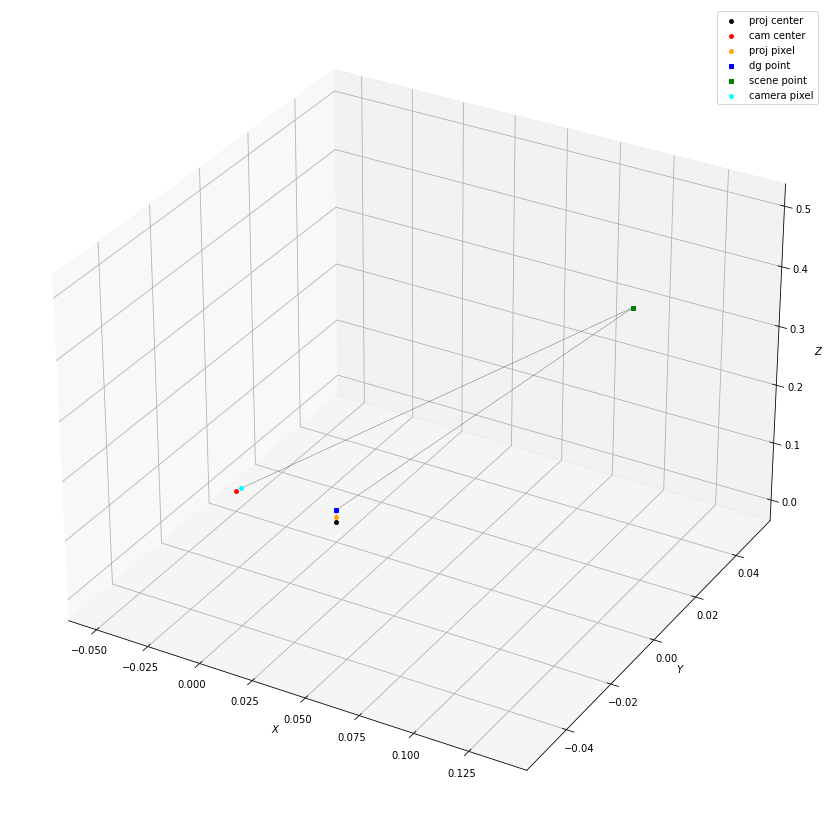

In [2]:

q = np.array([*((q - c_proj)*pitch_cam), f_proj] )


# proj center2pixel line
X_center2px_d = [t_proj[0], q[0]]
Y_center2px_d = [t_proj[0], q[1]]
Z_center2px_d = [t_proj[0], q[2]]


# intersection point on dg assuming the normal of the dg [0,0,1]
r = [q[0], q[1], dg_z]

# proj pixel2dg line
X_pixel2dg_d = [q[0], r[0]]
Y_pixel2dg_d = [q[1], r[1]]
Z_pixel2dg_d = [q[2], r[2]]

# diffraction
diffraction_angle = np.arcsin(m * wvl / groove_distance)

# diffracted direction
direction_unproj = np.array([np.sin(diffraction_angle), 0, np.cos(diffraction_angle)])

# scene point
P = ((z-r[2])/direction_unproj[2]) * direction_unproj + r

# dg2point line
X_dg2point_d = [r[0], P[0]]
Y_dg2point_d = [r[1], P[1]]
Z_dg2point_d = [r[2], P[2]]

# camera pixel
direction_proj = (t_cam-P)
direction_proj = direction_proj/np.sqrt((direction_proj**2).sum())
p = ((f_cam-P[2])/direction_proj[2]) * direction_proj + P

# point2 cam pixel line
X_point2cam_d = [P[0], p[0]]
Y_point2cam_d = [P[1], p[1]]
Z_point2cam_d = [P[2], p[2]]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

# center positions
ax.scatter(t_proj[0], t_proj[1], t_proj[2], color='black', s=15)
ax.scatter(t_cam[0], t_cam[1], t_cam[2], color='red', s=15)

# projector pixel
ax.scatter(q[0], q[1], q[2], color='orange', s=15, marker='o')

# point on diffraction grating 
ax.scatter(r[0], r[1], r[2], color='blue', s=15, marker='s')

# scene point 
ax.scatter(P[0], P[1], P[2], color='green', s=15, marker='s')

# camera pixel
ax.scatter(p[0], p[1], p[2], color='cyan', s=15, marker='o')


# center2pixel line
ax.plot(X_center2px_d,Y_center2px_d,Z_center2px_d, color = 'black', linewidth = 0.25)

# point2dg line
ax.plot(X_pixel2dg_d,Y_pixel2dg_d,Z_pixel2dg_d, color = 'black', linewidth = 0.25)

# dg2point line
ax.plot(X_dg2point_d,Y_dg2point_d,Z_dg2point_d, color = 'black', linewidth = 0.25)

# point2cam line
ax.plot(X_point2cam_d,Y_point2cam_d,Z_point2cam_d, color = 'black', linewidth = 0.25)

ax.legend(['proj center', 'cam center', 'proj pixel', 'dg point', 'scene point', 'camera pixel'])

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

print("proj. center:", t_proj)
print("cam. center:", t_cam)
print("proj. pixel:", q)
print("dg point:", r)
print("scene point:", P)
print("camera pixel:", p)